# Correlation and PCA Analysis
This notebook performs correlation analysis and PCA on two datasets:
`2881821.csv`
`complex.csv`

We clean the data, analyze correlations, remove outliers, and apply PCA for visualization.

## Step 1: Import Required Libraries
We start by importing all the necessary Python libraries for data loading, preprocessing, visualization, and analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

sns.set(style="whitegrid")


## # Step 2: Load the datasets

In [3]:
path_2881821 = "./2881821.csv"
path_complex = "./complex.csv"

# Load the datasets
simple_df = pd.read_csv(path_2881821)
complex_df = pd.read_csv(path_complex)


## Step 3: Preview the Datasets
Check the first few rows of both datasets to understand their structure.

In [4]:
print("Simple Dataset (2881821.csv):")
display(simple_df.head())

print("\nComplex Dataset:")
display(complex_df.head())


Simple Dataset (2881821.csv):


,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2025-03-18 06:54:26 UTC,1,6.0,6.0,3.6,5.0,0.0,0.0,0.0,0.0
1,2025-03-18 06:54:43 UTC,2,6.0,4.0,2.4,3.0,10.0,10.0,10.0,10.0
2,2025-03-18 06:54:59 UTC,3,6.0,7.0,4.2,6.0,3.0,3.0,3.0,3.0
3,2025-03-18 06:55:16 UTC,4,9.0,4.0,3.6,5.0,13.0,13.0,13.0,13.0
4,2025-03-18 06:55:31 UTC,5,4.0,4.0,1.6,3.0,22.0,22.0,22.0,22.0



Complex Dataset:


,time,s1,s2,s3
0,0,1.000000,2.00000,0.700000
1,1,1.010000,1.99995,0.707000
2,2,1.019999,1.99980,0.713999
3,3,1.029996,1.99955,0.720997
4,4,1.039989,1.99920,0.727993


## Step 4: Check for Missing Values
Identify if there are any missing values in the datasets that need to be handled.

In [14]:
print("\nMissing values in 2881821.csv:")
print(simple_df.isnull().sum())

print("\nMissing values in complex.csv:")
print(complex_df.isnull().sum())



Missing values in 2881821.csv:
created_at     0
entry_id       0
field1         0
field2         0
field3         0
field4         0
field5        24
field6        24
field7        24
field8        24
dtype: int64

Missing values in complex.csv:
time    0
 s1     0
 s2     0
 s3     0
dtype: int64


## Step 4: Check for Missing Values
Identify if there are any missing values in the datasets that need to be handled.

In [15]:
simple_numeric = simple_df.select_dtypes(include=[np.number]).drop(columns=['entry_id'], errors='ignore')
complex_numeric = complex_df.select_dtypes(include=[np.number])

simple_clean = simple_numeric.dropna()
complex_clean = complex_numeric.dropna()


## Step 6: Outlier Removal using Z-score
Remove outliers that fall outside 3 standard deviations using the Z-score method.

In [16]:
simple_zscore = simple_clean[(np.abs(zscore(simple_clean)) < 3).all(axis=1)]
complex_zscore = complex_clean[(np.abs(zscore(complex_clean)) < 3).all(axis=1)]


## Step 7: Correlation Matrices
Calculate and display the correlation matrix for each dataset.

In [17]:
print("Correlation matrix for 2881821.csv:")
display(simple_zscore.corr())

print("\nCorrelation matrix for complex.csv:")
display(complex_zscore.corr())


Correlation matrix for 2881821.csv:


,field1,field2,field3,field4,field5,field6,field7,field8
field1,1.000000,-0.063322,0.673358,-0.031259,-0.124605,-0.124605,-0.124605,-0.124605
field2,-0.063322,1.000000,0.663477,0.051877,-0.084534,-0.084534,-0.084534,-0.084534
field3,0.673358,0.663477,1.000000,0.026965,-0.143405,-0.143405,-0.143405,-0.143405
field4,-0.031259,0.051877,0.026965,1.000000,-0.140125,-0.140125,-0.140125,-0.140125
field5,-0.124605,-0.084534,-0.143405,-0.140125,1.000000,1.000000,1.000000,1.000000
field6,-0.124605,-0.084534,-0.143405,-0.140125,1.000000,1.000000,1.000000,1.000000
field7,-0.124605,-0.084534,-0.143405,-0.140125,1.000000,1.000000,1.000000,1.000000
field8,-0.124605,-0.084534,-0.143405,-0.140125,1.000000,1.000000,1.000000,1.000000



Correlation matrix for complex.csv:


,time,s1,s2,s3
time,1.000000,-0.030442,-0.230218,-0.083324
s1,-0.030442,1.000000,0.152738,0.960249
s2,-0.230218,0.152738,1.000000,0.059872
s3,-0.083324,0.960249,0.059872,1.000000


## Step 8: Correlation Heatmaps
Visualize the correlation matrices using heatmaps for easier interpretation.

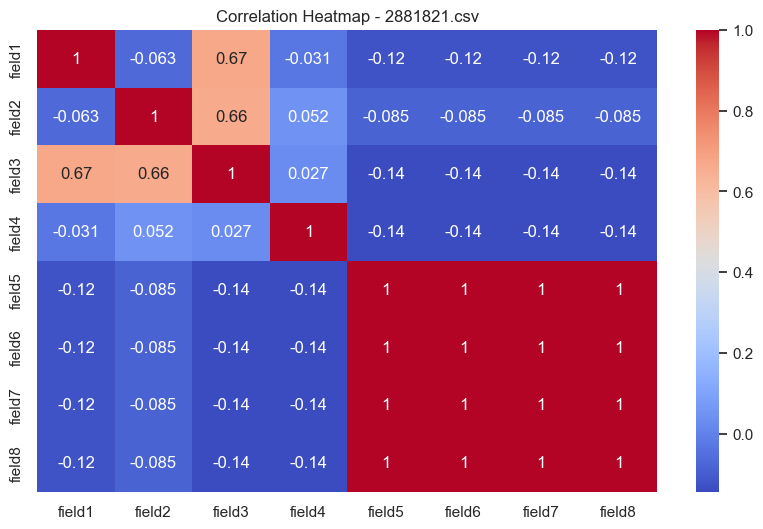

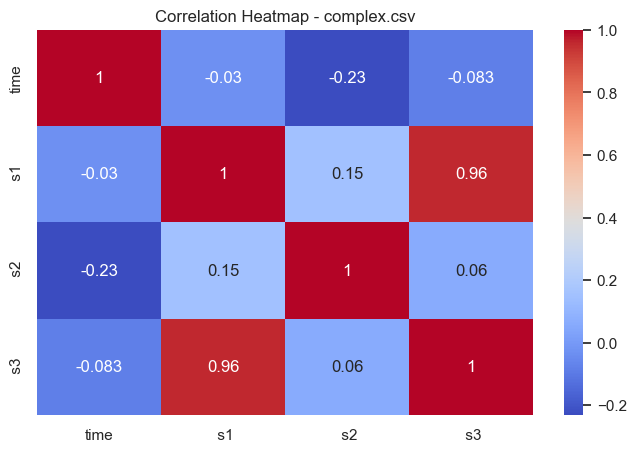

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(simple_zscore.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - 2881821.csv')
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(complex_zscore.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - complex.csv')
plt.show()


## Step 9: PCA (Principal Component Analysis)
Perform PCA to reduce the data to 2 dimensions and visualize it in a scatter plot.

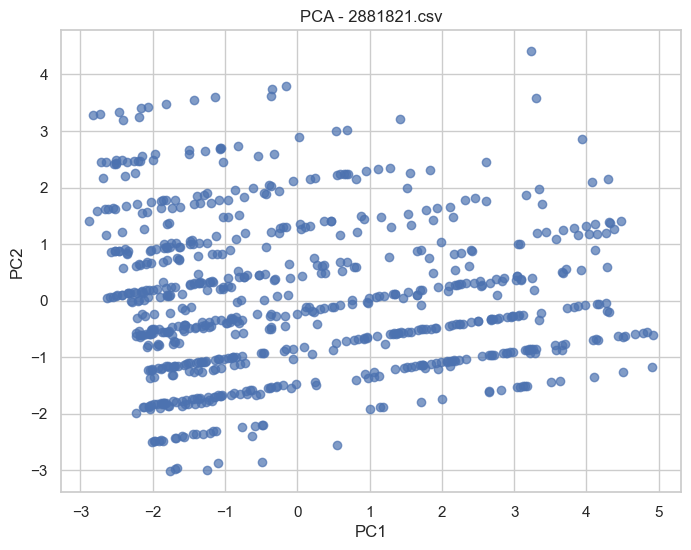

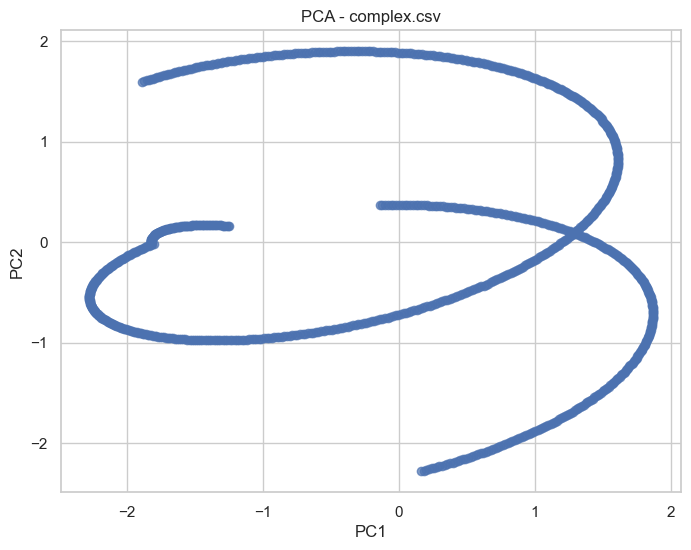

In [19]:
def perform_pca(df, title):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
    plt.title(f"PCA - {title}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

perform_pca(simple_zscore, "2881821.csv")
perform_pca(complex_zscore, "complex.csv")
